In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [4]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)
df_orig = df.copy()
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [5]:
a = df.groupby(df['Churn']).count()
a

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


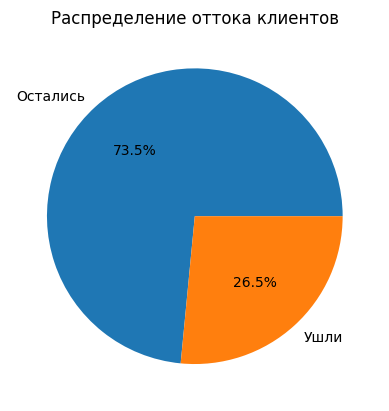

In [6]:
a['gender']
labels = ['Остались', 'Ушли']

plt.pie(a['gender'], labels=labels, autopct='%1.1f%%')
plt.title("Распределение оттока клиентов")
plt.show()

In [7]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [9]:
cat_columns = ['gender', 'Near_Location', 'Partner',
               'Promo_friends', 'Phone', 'Contract_period',
               'Group_visits', 'Age', 'Lifetime', 'Churn']

for col in cat_columns:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             4000 non-null   category
 1   Near_Location                      4000 non-null   category
 2   Partner                            4000 non-null   category
 3   Promo_friends                      4000 non-null   category
 4   Phone                              4000 non-null   category
 5   Contract_period                    4000 non-null   category
 6   Group_visits                       4000 non-null   category
 7   Age                                4000 non-null   category
 8   Avg_additional_charges_total       4000 non-null   float64 
 9   Month_to_end_contract              4000 non-null   float64 
 10  Lifetime                           4000 non-null   category
 11  Avg_class_frequency_total          4000 non

<Axes: xlabel='Age', ylabel='count'>

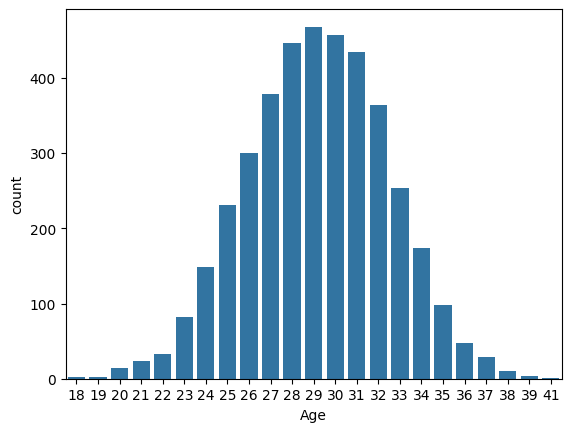

In [11]:
sns.countplot(data=df, x = 'Age') 

In [12]:
gender_0 = df[df['gender']==0]
gender_1 = df[df['gender']==1]

In [13]:
stat, p = mannwhitneyu(gender_0, gender_1, alternative='two-sided')

In [14]:
columns_0 = gender_0.columns
columns_0 = columns_0.drop('gender')
results = []

for col in columns_0:
    stat, p = mannwhitneyu(gender_0[col], gender_1[col], alternative='two-sided')
    results.append([col,stat,p])

resudf_results = pd.DataFrame(results, columns=["Столбец", "Статистика", "p-value"])

resudf_results.sort_values(by='p-value',ascending=False)

,Столбец,Статистика,p-value
8,Month_to_end_contract,1998134.0,0.975350
12,Churn,1997910.0,0.964317
4,Contract_period,1996064.0,0.924923
7,Avg_additional_charges_total,2003594.0,0.903342
2,Promo_friends,2008456.5,0.750276
0,Near_Location,1989470.0,0.671842
9,Lifetime,1983255.5,0.660260
6,Age,1980412.0,0.606121
3,Phone,2009246.5,0.589089
11,Avg_class_frequency_current_month,1976967.0,0.543298


Ни одно значание не вышло за критическую область в 0.05, что можно интерпретировать как: пол (gender) не оказывает статистически значимого влияния ни на один из параметров. Значит нет оснований отвергать H0.

In [15]:
columns_0 = gender_0.columns
columns_0 = columns_0.drop('gender')
results = []

for col in columns_0:
    stat, p = shapiro(df[col])
    results.append([col,stat,p])
    
resudf_results = pd.DataFrame(results, columns=["Столбец", "Статистика", "p-value"])

resudf_results.sort_values(by='Статистика',ascending=False)

,Столбец,Статистика,p-value
6,Age,0.991515,1.018004e-14
10,Avg_class_frequency_total,0.991272,5.735722e-15
11,Avg_class_frequency_current_month,0.982500,7.539839e-22
7,Avg_additional_charges_total,0.963122,8.667115e-31
9,Lifetime,0.816842,1.607944e-55
8,Month_to_end_contract,0.740261,6.537167e-62
4,Contract_period,0.713690,9.324891e-64
1,Partner,0.636368,2.093873e-68
5,Group_visits,0.625331,5.342212e-69
2,Promo_friends,0.580961,3.047099e-71


In [16]:
from scipy.stats import normaltest

stat, p_value = normaltest(df['Age'])

print(f"Д’Агостино-Пирсона: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

stat, p_value = shapiro(df['Age'])

print(f"Шапиро: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

Д’Агостино-Пирсона: Статистика теста: 5.5463, p-value: 0.0625
Шапиро: Статистика теста: 0.9915, p-value: 0.0000


-----------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

In [17]:
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


array([[<Axes: title={'center': 'Avg_additional_charges_total'}>,
        <Axes: title={'center': 'Avg_class_frequency_total'}>],
       [<Axes: title={'center': 'Avg_class_frequency_current_month'}>,
        <Axes: title={'center': 'Month_to_end_contract'}>]], dtype=object)

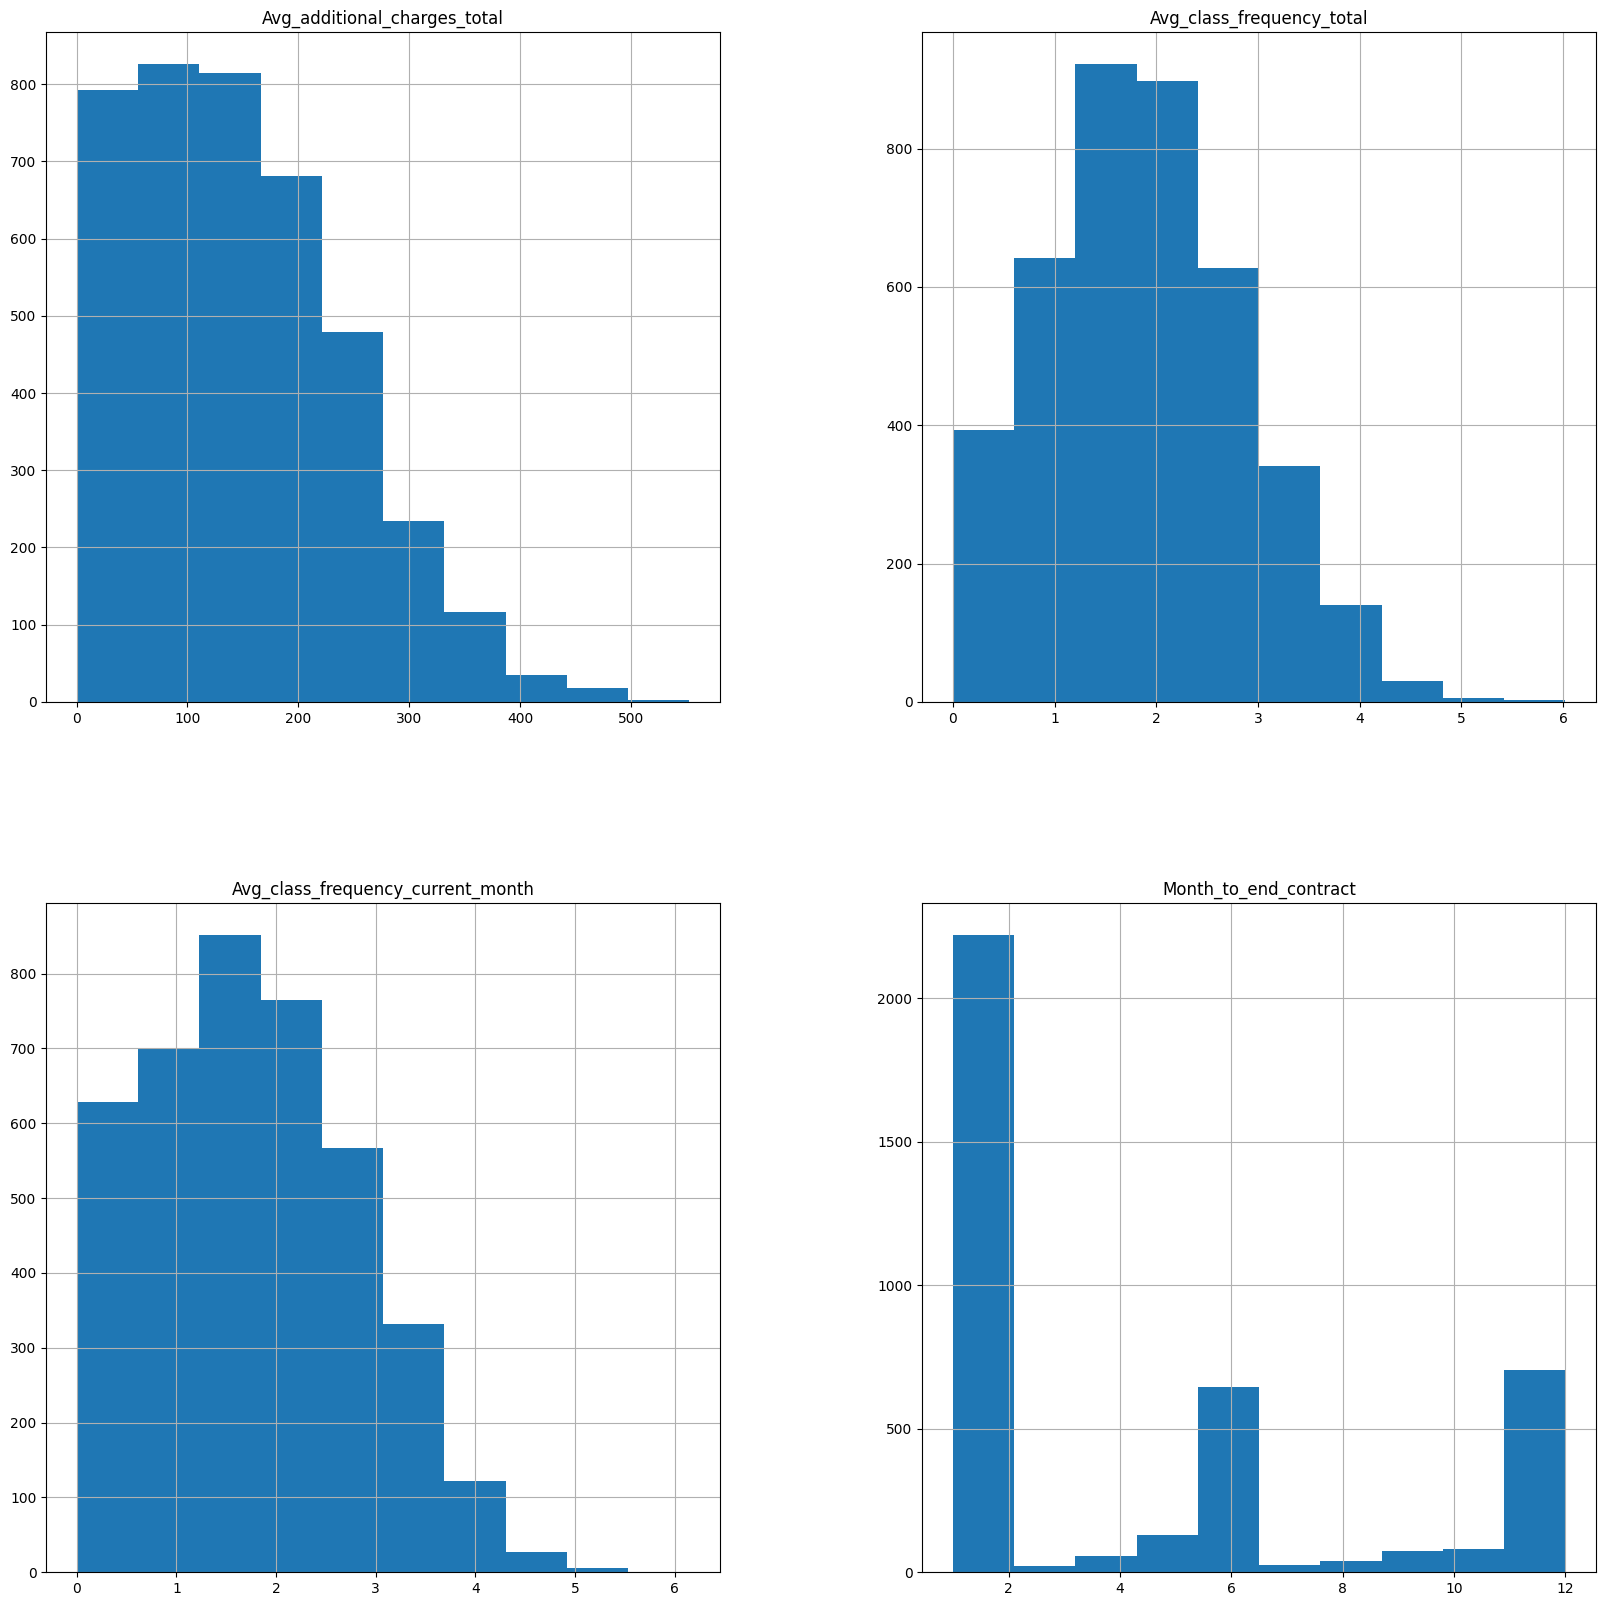

In [18]:
df[['Avg_additional_charges_total','Avg_class_frequency_total','Avg_class_frequency_current_month','Month_to_end_contract','Age']].hist(figsize=(20,20))

<Axes: xlabel='Avg_additional_charges_total', ylabel='Count'>

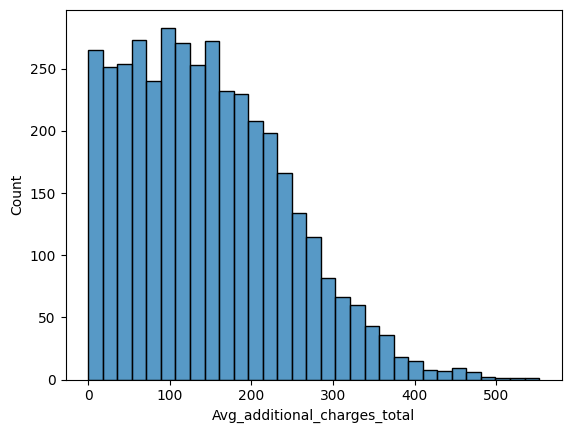

In [19]:
sns.histplot(data = df['Avg_additional_charges_total'])


<Axes: xlabel='Avg_additional_charges_total', ylabel='Count'>

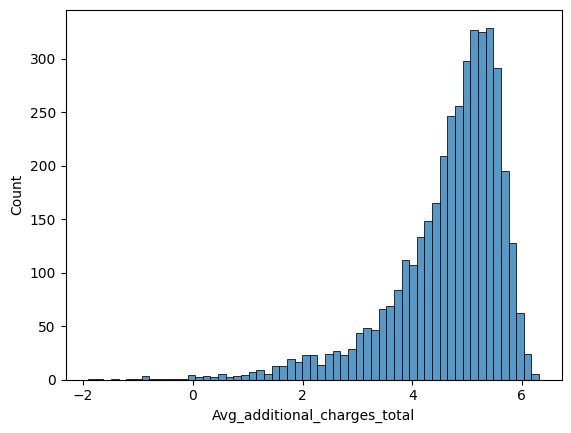

In [20]:
df1 = np.log(df['Avg_additional_charges_total'])
sns.histplot(data = df1)

<Axes: ylabel='Count'>

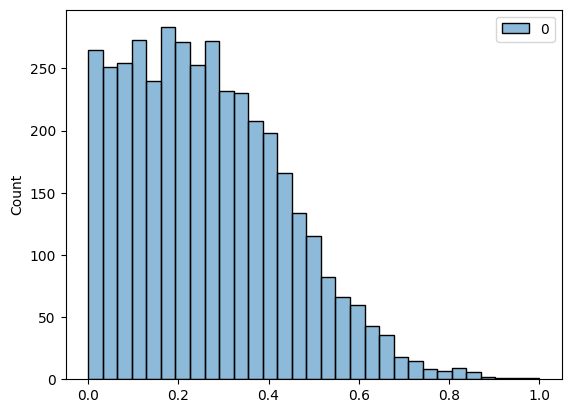

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df[['Avg_additional_charges_total']])

sns.histplot(data = df2)

<Axes: ylabel='Count'>

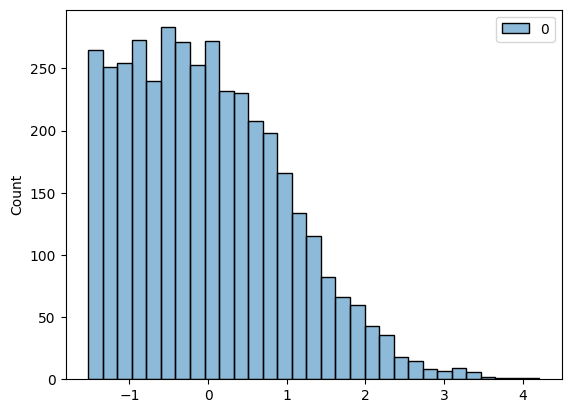

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2 = scaler.fit_transform(df[['Avg_additional_charges_total']])

sns.histplot(data = df2)

<Axes: xlabel='Avg_additional_charges_total', ylabel='Count'>

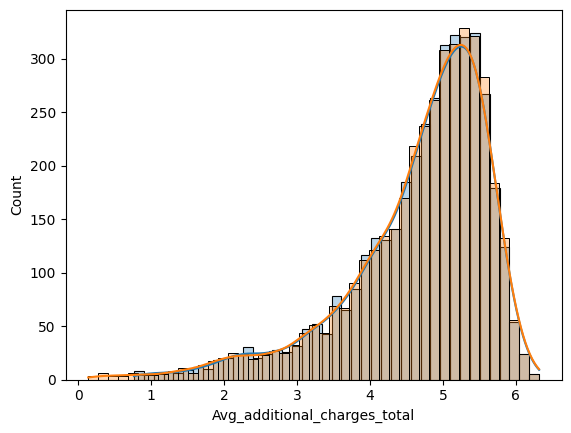

In [23]:
X_log = np.log1p(df['Avg_additional_charges_total'] + 1)

sns.histplot(data = X_log, kde=True, alpha=0.3)

X_log = np.log1p(df['Avg_additional_charges_total'])

sns.histplot(data = X_log, kde=True, alpha=0.3)


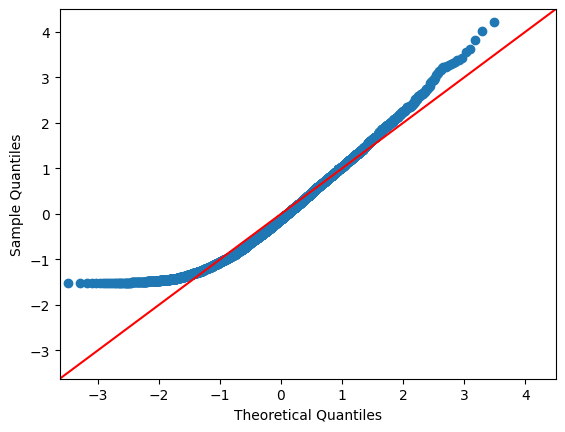

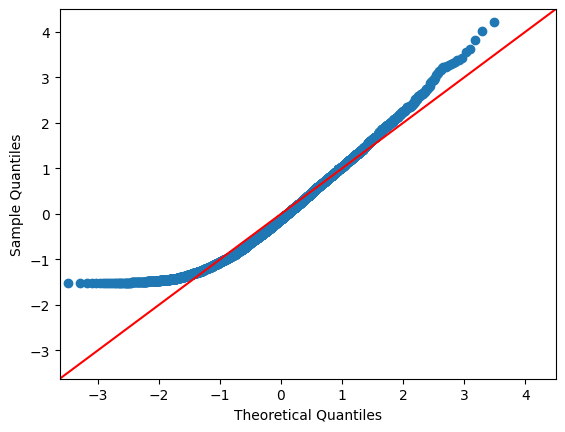

In [40]:
sm.qqplot(data = df['Avg_additional_charges_total'], fit=True, line='45')

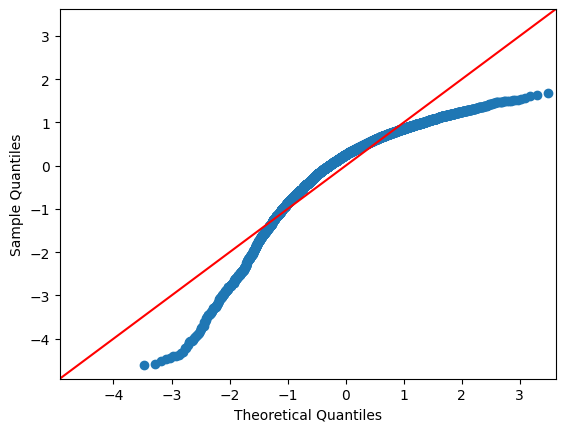

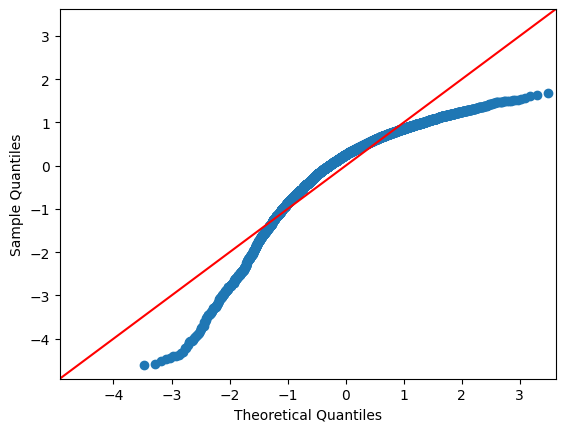

In [41]:
sm.qqplot(data = X_log, fit=True, line='45')

<Axes: xlabel='Avg_additional_charges_total', ylabel='Count'>

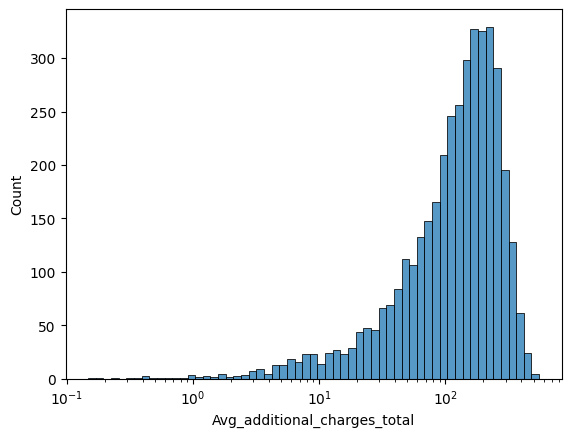

In [25]:
sns.histplot(data = df['Avg_additional_charges_total'], log_scale=True)

In [26]:
# Преобразование столбца 'Age' в числовой тип
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Применяем логарифмирование
X_log_age = np.log1p(df['Age'])


In [27]:
stat, p_value = shapiro(X_log)

print(f"Шапиро: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

stat, p_value = normaltest(X_log)

print(f"Д’Агостино-Пирсона: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

Шапиро: Статистика теста: 0.8847, p-value: 0.0000
Д’Агостино-Пирсона: Статистика теста: 1048.6291, p-value: 0.0000


In [28]:
stat, p_value = shapiro(df['Age'])

print(f"Шапиро: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

stat, p_value = normaltest(df['Age'])

print(f"Д’Агостино-Пирсона: Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")

Шапиро: Статистика теста: 0.9915, p-value: 0.0000
Д’Агостино-Пирсона: Статистика теста: 5.5463, p-value: 0.0625


In [29]:
df_orig

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [30]:
df_orig.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [31]:
bins = [18,25,30,35,40,45]

df_orig['Age_category'] = pd.cut(df_orig['Age'], bins = bins)

In [32]:
age_gender_category = df_orig.groupby('Age_category')['gender'].count()
age_gender_category = age_gender_category.reset_index(name = 'count')
age_gender_category

C:\Users\palux\AppData\Local\Temp\ipykernel_16956\522867800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_category = df_orig.groupby('Age_category')['gender'].count()


,Age_category,count
0,"(18, 25]",534
1,"(25, 30]",2050
2,"(30, 35]",1323
3,"(35, 40]",90
4,"(40, 45]",1


<Axes: xlabel='Age_category', ylabel='count'>

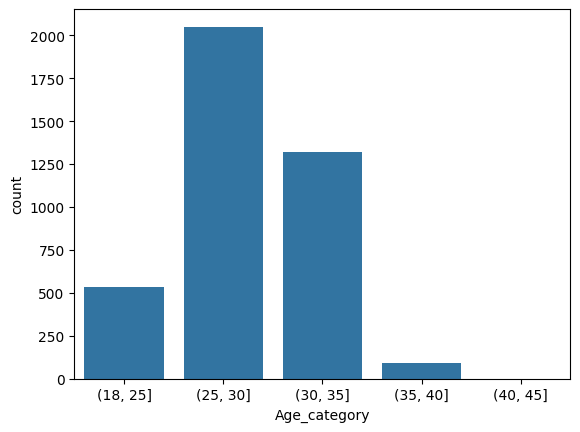

In [33]:
sns.barplot(data = age_gender_category,x = 'Age_category', y = 'count')

In [34]:
df_orig.groupby('Age_category').mean()

C:\Users\palux\AppData\Local\Temp\ipykernel_16956\2841047450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_orig.groupby('Age_category').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Age_category,,,,,,,,,,,,,,
"(18, 25]",0.494382,0.803371,0.419476,0.275281,0.919476,3.503745,0.352060,23.897004,132.817059,3.290262,2.361423,1.665094,1.398920,0.617978
"(25, 30]",0.513171,0.841951,0.487317,0.300000,0.899024,4.540976,0.401463,28.197073,145.451230,4.208780,3.700488,1.858117,1.736992,0.296585
"(30, 35]",0.504913,0.863190,0.520030,0.336357,0.905518,5.326531,0.446712,32.348450,153.124774,4.857899,4.267574,1.975497,1.932734,0.090703
"(35, 40]",0.633333,0.911111,0.388889,0.300000,0.877778,5.500000,0.511111,36.644444,174.232238,5.288889,4.477778,2.232151,2.242371,0.011111
"(40, 45]",0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,41.000000,310.463578,1.000000,1.000000,0.324260,0.420895,0.000000
